<a href="https://colab.research.google.com/github/Ax3l2710/Portofolio/blob/main/PADI_UMKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PADI UMKM

Please find data that we will use for analytics:
- Order Details: https://drive.google.com/file/d/1DYS5c27VcJOkQr2VmIjJIrHhQDqvqioU/view?usp=share_link
- Order Transaction: https://drive.google.com/file/d/1VpxJMK6ZJBsyy8eApHCACjhfFusvlJZZ/view?usp=share_link
- Products: https://drive.google.com/file/d/1oRzmLytWNTzJ_zWfcOyC7Cwrdw10Oh9C/view?usp=share_link
- Users: https://drive.google.com/file/d/18V1efasan0efz5et1TgjSGq_wcYTc6k2/view?usp=share_link

In [1]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
import matplotlib.pyplot as plt     # To perform data visualization
import plotly.graph_objects as go   # To perform graph visualization
import seaborn as sns               # To perform data visualization
from datetime import datetime       # Used to perform dates and time manipulation

In [2]:
!pip install gdown # Install gdown

In [3]:
import gdown # Import gdown

In [4]:
url2 = "https://drive.google.com/file/d/1VpxJMK6ZJBsyy8eApHCACjhfFusvlJZZ/view?usp=share_link"
output2 = 'order_transaction.csv' # Import dataset to google colab
gdown.download(url2, output2, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1VpxJMK6ZJBsyy8eApHCACjhfFusvlJZZ
To: /content/order_transaction.csv
100%|██████████| 24.2M/24.2M [00:00<00:00, 48.3MB/s]


'order_transaction.csv'

In [5]:
# To import data from CSV file, we can use `pd.read_csv('filename.csv')` function
# Let's import it and store it as "df" variable

df_order_transaction = pd.read_csv('/content/order_transaction.csv',low_memory=False)
df_order_transaction .head()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2022-12-12-8804434,12/12/2022,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2022-10-11-4866339,10/11/2022,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2022-12-08-7257980,12/8/2022,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2022-04-18-108977,4/18/2022,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2022-12-13-1031978,12/13/2022,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


In [6]:
df_order_transaction .tail()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
159128,PO-2022-06-16-128661,6/16/2022,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,NaN,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2022-11-30-4342388,11/30/2022,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,NaN,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2022-06-07-123774,6/7/2022,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,NaN,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2022-07-21-143881,7/21/2022,293510,Selesai,Direct,QREN,self,0,6500,0.0,NaN,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e
159132,PO-2022-11-30-5473461,11/30/2022,455203,Selesai,Direct,QREN,self,0,27000,0.0,NaN,202,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


In [7]:
df_order_transaction .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            159133 non-null  object 
 1   transaction_date     159133 non-null  object 
 2   order_id             159133 non-null  int64  
 3   order_status         159133 non-null  object 
 4   payment_group        159133 non-null  object 
 5   payment_method       159133 non-null  object 
 6   shipping_agency      159133 non-null  object 
 7   shipping_cost        159133 non-null  int64  
 8   total_project_value  159133 non-null  int64  
 9   voucher_val          68399 non-null   float64
 10  voucher_code         5160 non-null    object 
 11  revenue              159133 non-null  int64  
 12  seller_id            159127 non-null  object 
 13  seller_category      159127 non-null  object 
 14  buyer_id             159133 non-null  object 
dtypes: float64(1), in

## CLEANING PROCESS

### MISSING VALUE

In [8]:
# Check Missing Value in dataset
print("Missing Values in dataset:")
print(df_order_transaction.isnull().sum())

Missing Values in dataset:
po_number                   0
transaction_date            0
order_id                    0
order_status                0
payment_group               0
payment_method              0
shipping_agency             0
shipping_cost               0
total_project_value         0
voucher_val             90734
voucher_code           153973
revenue                     0
seller_id                   6
seller_category             6
buyer_id                    0
dtype: int64


In [9]:
# Check how much null values exist
round(df_order_transaction.isnull().sum() / len(df_order_transaction) * 100,2)

po_number               0.00
transaction_date        0.00
order_id                0.00
order_status            0.00
payment_group           0.00
payment_method          0.00
shipping_agency         0.00
shipping_cost           0.00
total_project_value     0.00
voucher_val            57.02
voucher_code           96.76
revenue                 0.00
seller_id               0.00
seller_category         0.00
buyer_id                0.00
dtype: float64

### UNIQUE VALUE

In [10]:
# Check unique values in every column
# Check with Data Dictionary
for col in df_order_transaction.columns:
  print(col)
  print(df_order_transaction[col].value_counts())
  print('\n') # Give 1 new line (enter)

po_number
PO-2022-12-12-8804434    1
PO-2022-02-21-88908      1
PO-2022-09-28-9103188    1
PO-2022-03-04-91728      1
PO-2022-10-07-1628239    1
                        ..
PO-2022-11-16-8864734    1
PO-2022-12-27-4090504    1
PO-2022-02-21-88811      1
PO-2022-02-10-85759      1
PO-2022-11-30-5473461    1
Name: po_number, Length: 159133, dtype: int64


transaction_date
10/12/2022    2517
10/11/2022    2198
12/12/2022    1981
12/13/2022    1792
10/10/2022    1444
              ... 
5/7/2022         5
1/2/2022         3
1/9/2022         2
9/17/2022        1
5/2/2022         1
Name: transaction_date, Length: 363, dtype: int64


order_id
463776    1
102449    1
416545    1
263241    1
423212    1
         ..
445117    1
474442    1
203037    1
245470    1
455203    1
Name: order_id, Length: 159133, dtype: int64


order_status
Selesai                       136991
Dibatalkan                      4979
Ditolak Penjual                 4381
Expired                         4254
Menunggu Pembayara

### DATE TIME FORMAT

In [11]:
# Change date data type from string to date time
df_order_transaction['transaction_date'] = pd.to_datetime(df_order_transaction['transaction_date'])
df_order_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            159133 non-null  object        
 1   transaction_date     159133 non-null  datetime64[ns]
 2   order_id             159133 non-null  int64         
 3   order_status         159133 non-null  object        
 4   payment_group        159133 non-null  object        
 5   payment_method       159133 non-null  object        
 6   shipping_agency      159133 non-null  object        
 7   shipping_cost        159133 non-null  int64         
 8   total_project_value  159133 non-null  int64         
 9   voucher_val          68399 non-null   float64       
 10  voucher_code         5160 non-null    object        
 11  revenue              159133 non-null  int64         
 12  seller_id            159127 non-null  object        
 13  seller_categor

In [12]:
df_order_transaction.head()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2022-12-12-8804434,2022-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2022-12-08-7257980,2022-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2022-04-18-108977,2022-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2022-12-13-1031978,2022-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


In [13]:
df_order_transaction.tail()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
159128,PO-2022-06-16-128661,2022-06-16,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,NaN,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2022-11-30-4342388,2022-11-30,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,NaN,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,NaN,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2022-07-21-143881,2022-07-21,293510,Selesai,Direct,QREN,self,0,6500,0.0,NaN,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e
159132,PO-2022-11-30-5473461,2022-11-30,455203,Selesai,Direct,QREN,self,0,27000,0.0,NaN,202,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


### DUPLICATED VALUE

In [14]:
# Check duplicate all table
df_order_transaction[df_order_transaction.duplicated()]

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id


## EXPLORATORY DATA ANALYSIS 1

In [76]:
#Total Revenue
total_revenue = df_order_transaction['revenue'].sum()
print("Total Revenue =",total_revenue.sum())

# Total Project Value
total_project_value = df_order_transaction['total_project_value'].sum()
print("Total Project Value =",total_project_value.sum())

# Total Order
total_order = df_order_transaction['order_id'].count()
print("Total Order =",total_order.sum())

# Average Order Value (AOV)
aov = df_order_transaction['revenue'].sum() / df_order_transaction['order_id'].count()
print("AOV =",aov)

# Average Order Cost (AOC)
aoc = df_order_transaction['total_project_value'].sum() / df_order_transaction['order_id'].count()
print("AOC =",aoc)

# Average Order per User (AOU)
aou = df_order_transaction['order_id'].mean()
print("Average Order per Customer =",aou)

Total Revenue = 24280815963
Total Project Value = 3747316980028
Total Order = 159133
AOV = 152581.90295538952
AOC = 23548333.658185292
Average Order per Customer = 296754.0089861939


## K-MEANS CLUSTERING ANALYSIS (BUYER)

In [16]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis

### PREPARATION DATA

In [17]:
df_order_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            159133 non-null  object        
 1   transaction_date     159133 non-null  datetime64[ns]
 2   order_id             159133 non-null  int64         
 3   order_status         159133 non-null  object        
 4   payment_group        159133 non-null  object        
 5   payment_method       159133 non-null  object        
 6   shipping_agency      159133 non-null  object        
 7   shipping_cost        159133 non-null  int64         
 8   total_project_value  159133 non-null  int64         
 9   voucher_val          68399 non-null   float64       
 10  voucher_code         5160 non-null    object        
 11  revenue              159133 non-null  int64         
 12  seller_id            159127 non-null  object        
 13  seller_categor

In [18]:
df_buyer = df_order_transaction.groupby(['buyer_id','total_project_value','revenue'])['order_id'].count()
df_buyer = df_buyer.reset_index()
df_buyer.head()

,buyer_id,total_project_value,revenue,order_id
0,631a4da47255a77e0e6d7410,10000,75,8
1,631a4da47255a77e0e6d7410,11100,83,1
2,631a4da47255a77e0e6d7410,15000,112,1
3,631a4da47255a77e0e6d7410,25000,187,2
4,631a4da47255a77e0e6d7410,33813,253,1


In [19]:
# Check number of buyer
number_of_buyer = df_buyer['buyer_id'].count()
print("Number of Buyer =",number_of_buyer)

Number of Buyer = 116649


In [20]:
# Calculate Average Order Cost (AOC) & Average Order Value (AOV)
df_buyer['AOC'] = df_buyer['total_project_value'] / df_buyer['order_id']
df_buyer['AOV'] = df_buyer['revenue'] / df_buyer['order_id']
df_buyer.head()

,buyer_id,total_project_value,revenue,order_id,AOC,AOV
0,631a4da47255a77e0e6d7410,10000,75,8,1250.0,9.375
1,631a4da47255a77e0e6d7410,11100,83,1,11100.0,83.000
2,631a4da47255a77e0e6d7410,15000,112,1,15000.0,112.000
3,631a4da47255a77e0e6d7410,25000,187,2,12500.0,93.500
4,631a4da47255a77e0e6d7410,33813,253,1,33813.0,253.000


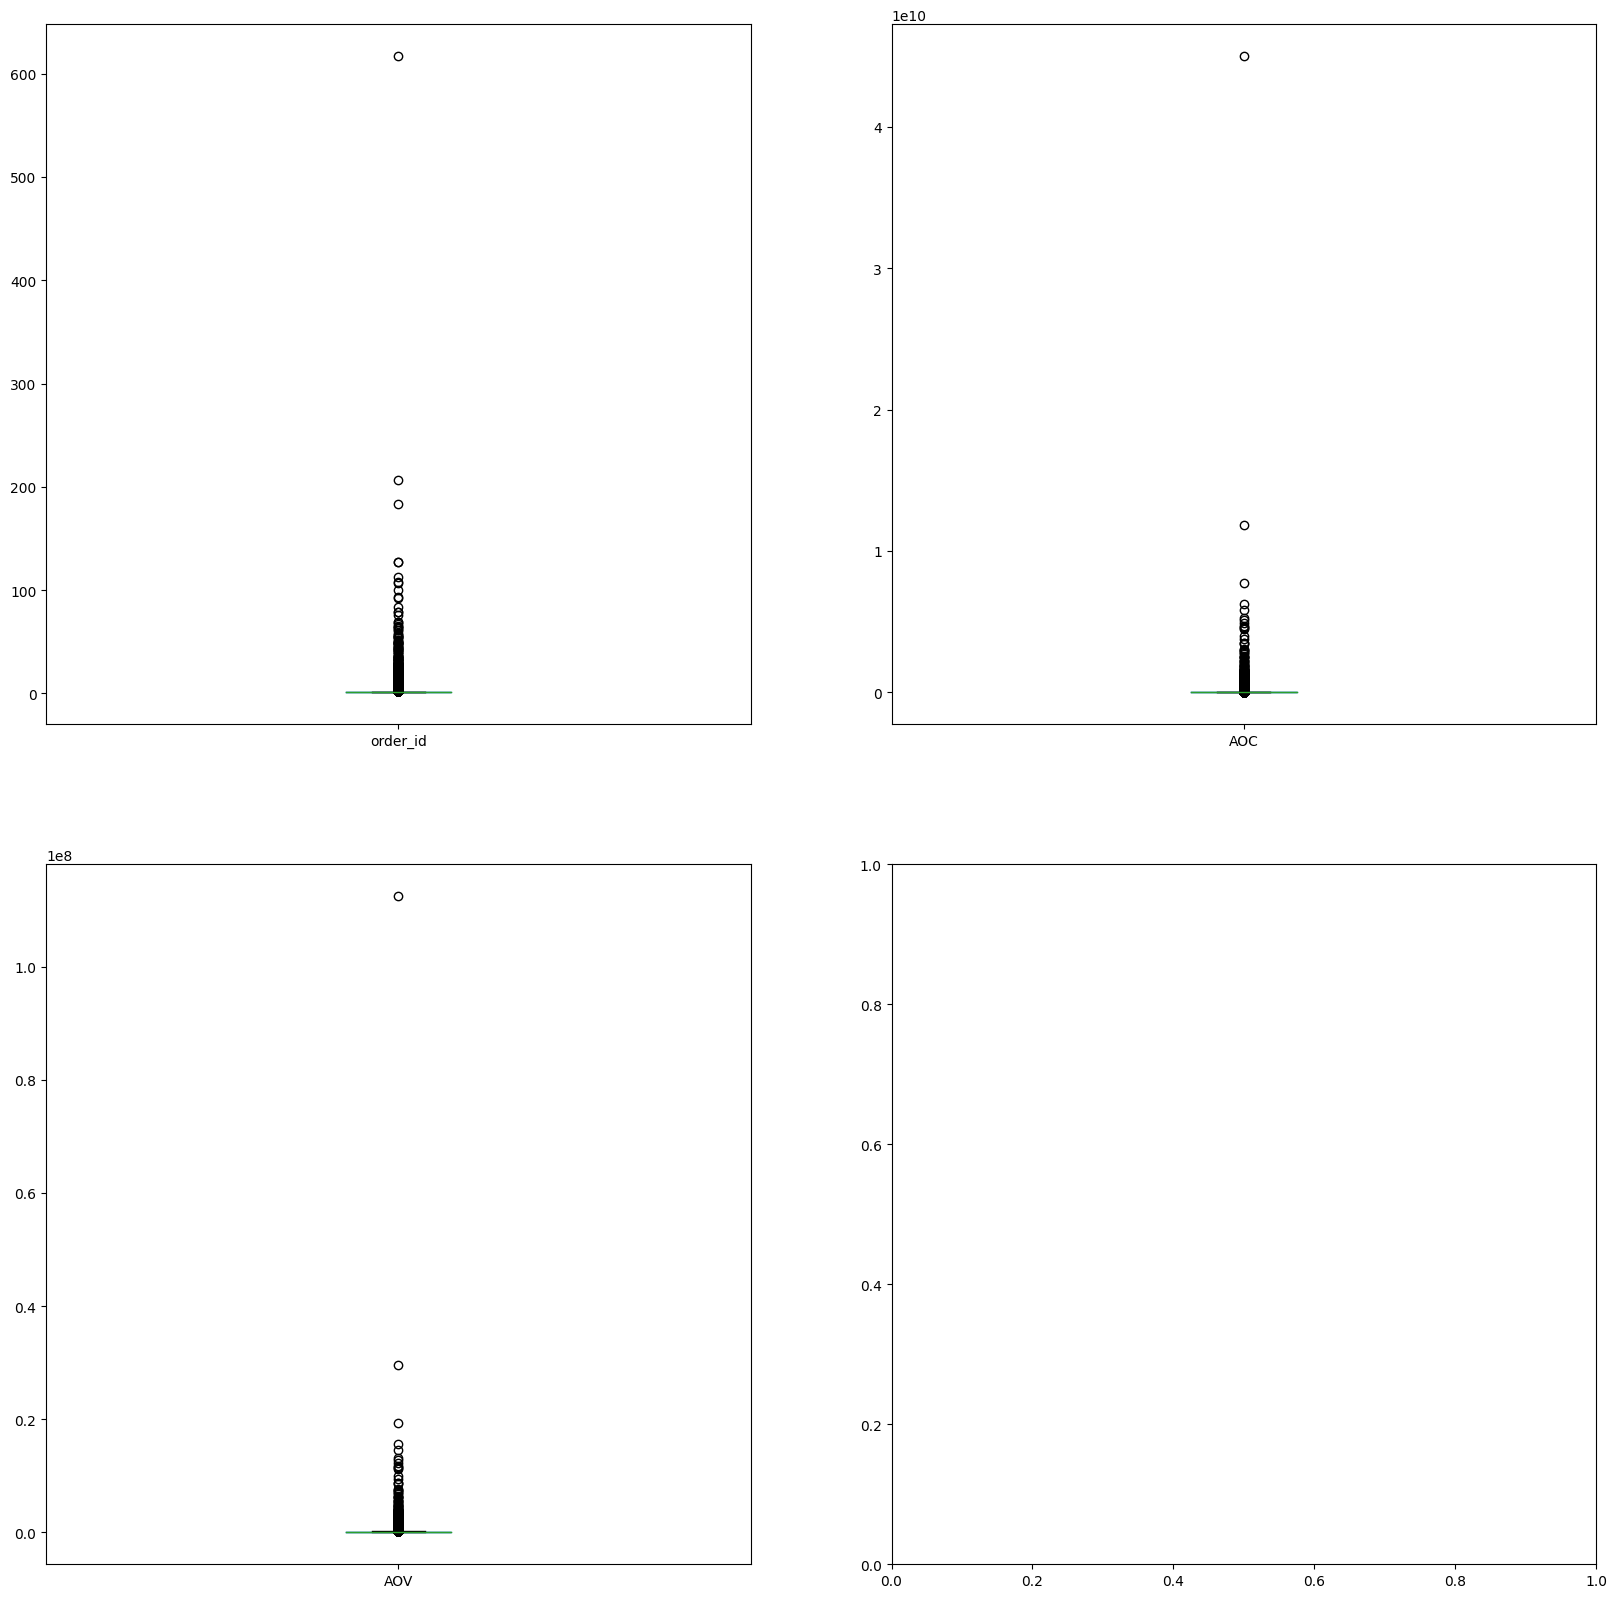

In [21]:
# filter numeric column
feature = ['order_id','AOC', 'AOV']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_buyer.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

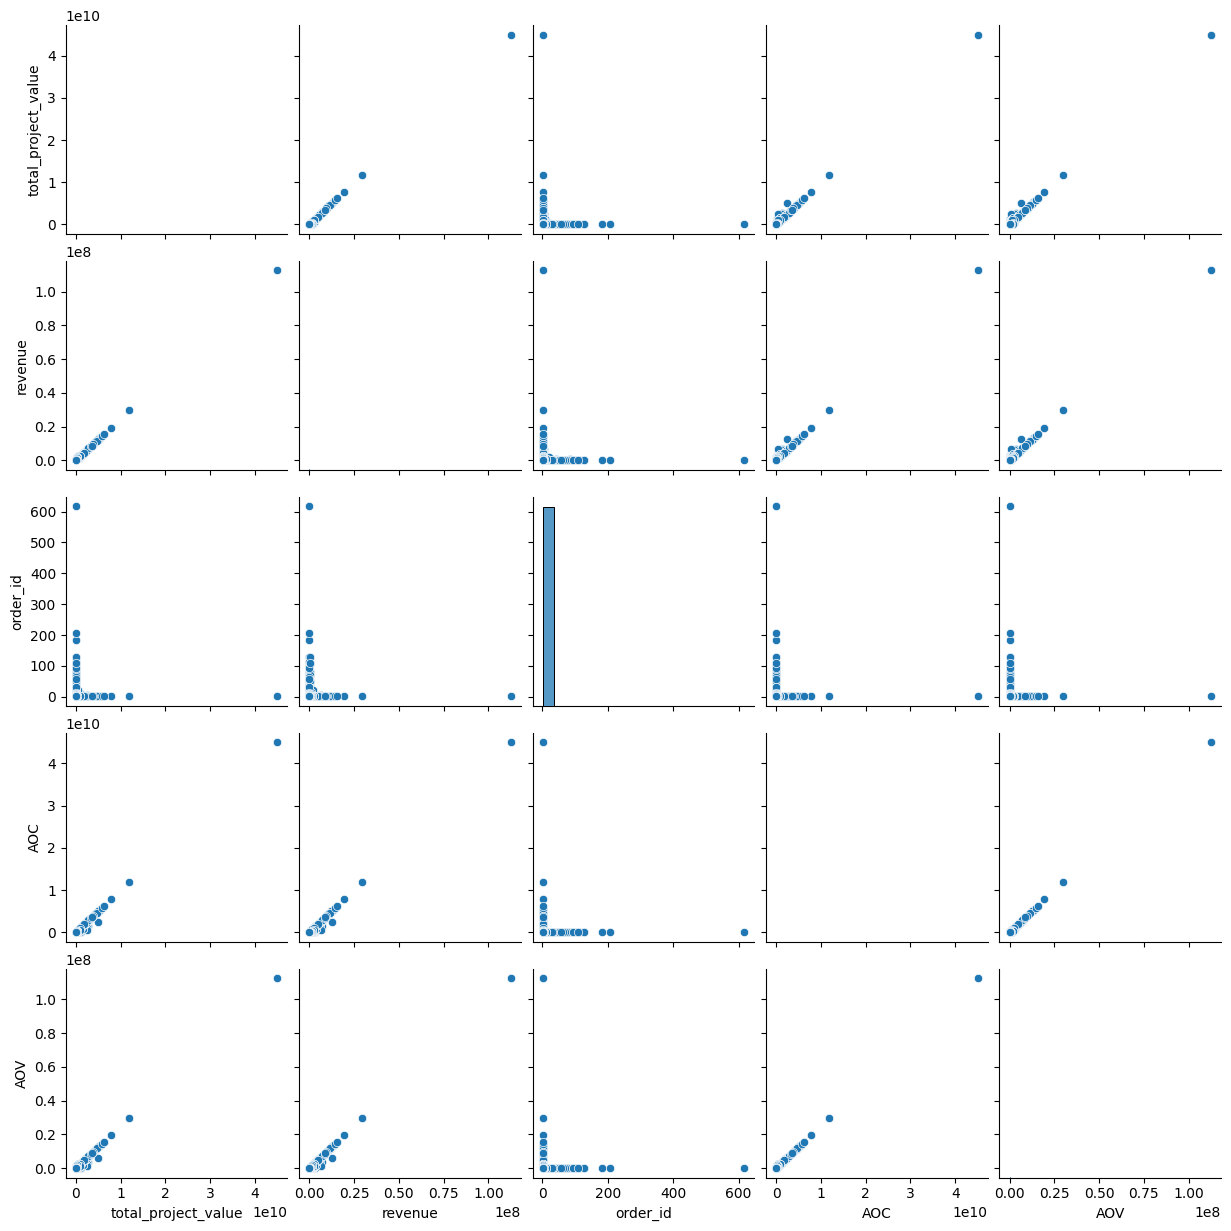

In [22]:
sns.pairplot(df_buyer)

In [23]:
buyer_clustering_feature = df_buyer[['order_id','AOC', 'AOV']]
buyer_clustering_feature.head()

,order_id,AOC,AOV
0,8,1250.0,9.375
1,1,11100.0,83.000
2,1,15000.0,112.000
3,2,12500.0,93.500
4,1,33813.0,253.000


### STANDARD SCALER

In [24]:
# Define Standard Scale dataset
ss_scale_df = buyer_clustering_feature.copy()
column = ['order_id','AOC', 'AOV']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

In [25]:
ss_scale_df[['order_id','AOC', 'AOV']].head()

,order_id,AOC,AOV
0,2.376209,-0.141460,-0.309955
1,-0.130418,-0.141399,-0.309800
2,-0.130418,-0.141375,-0.309739
3,0.227672,-0.141391,-0.309778
4,-0.130418,-0.141260,-0.309443


### ROBUST SCALER

In [26]:
# Define Robust Scale dataset
rs_scale_df = buyer_clustering_feature.copy()
column = buyer_clustering_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['order_id','AOC', 'AOV']] = rs_scaler.fit_transform(rs_scale_df[['order_id','AOC', 'AOV']])

In [27]:
rs_scale_df.head()

,order_id,AOC,AOV
0,7.0,-0.228025,-0.228026
1,0.0,-0.227458,-0.227461
2,0.0,-0.227233,-0.227238
3,1.0,-0.227377,-0.227380
4,0.0,-0.226150,-0.226155


### MIN MAX SCALER

In [28]:
# Define Minmax Scale dataset
mm_scale_df = buyer_clustering_feature.copy()
column = buyer_clustering_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['order_id','AOC', 'AOV']] = mm_scaler.fit_transform(mm_scale_df[['order_id','AOC', 'AOV']])

In [29]:
mm_scale_df.head()

,order_id,AOC,AOV
0,0.011364,2.778370e-08,8.335111e-08
1,0.000000,2.467193e-07,7.379352e-07
2,0.000000,3.334045e-07,9.957680e-07
3,0.001623,2.778370e-07,8.312885e-07
4,0.000000,7.515603e-07,2.249369e-06


### ELBOW METHOD

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

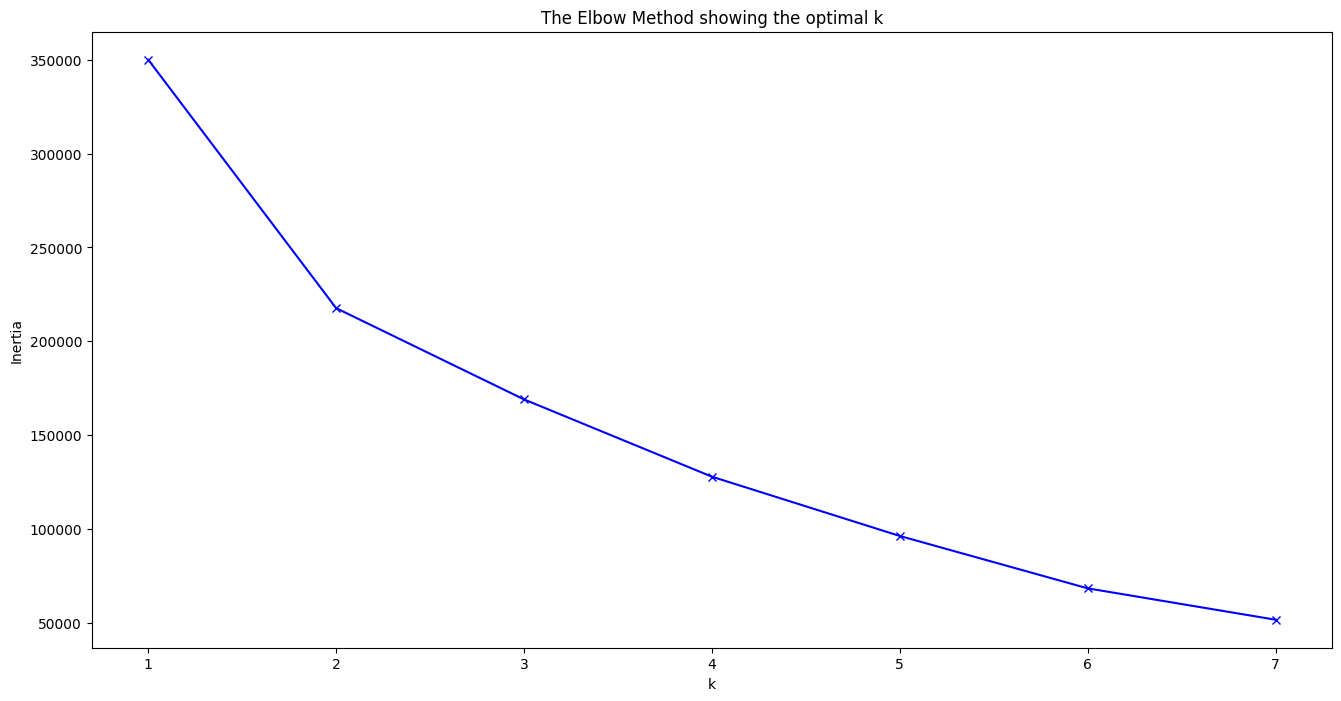

[349946.9999999993, 217680.45464475692, 169080.51955661975, 127928.00019740131, 96374.95941756829, 68484.02746477508, 51776.638465337404]


In [30]:
# K-Means Clustering
# Using standar scaler
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

#### SILHOUETTE ANALYSIS

In [31]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 5 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[1,2,3,4,5,6,7]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.9979810045738537


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.9966798148139943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.7788330097512597


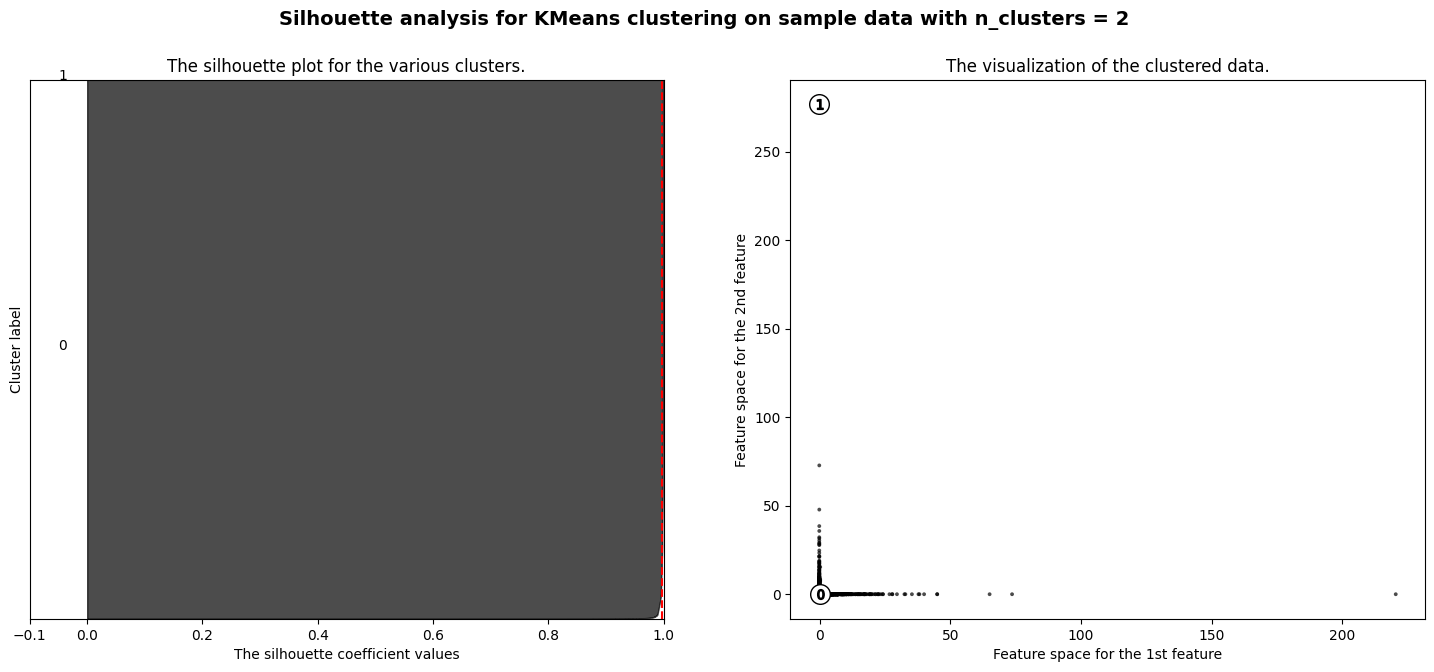

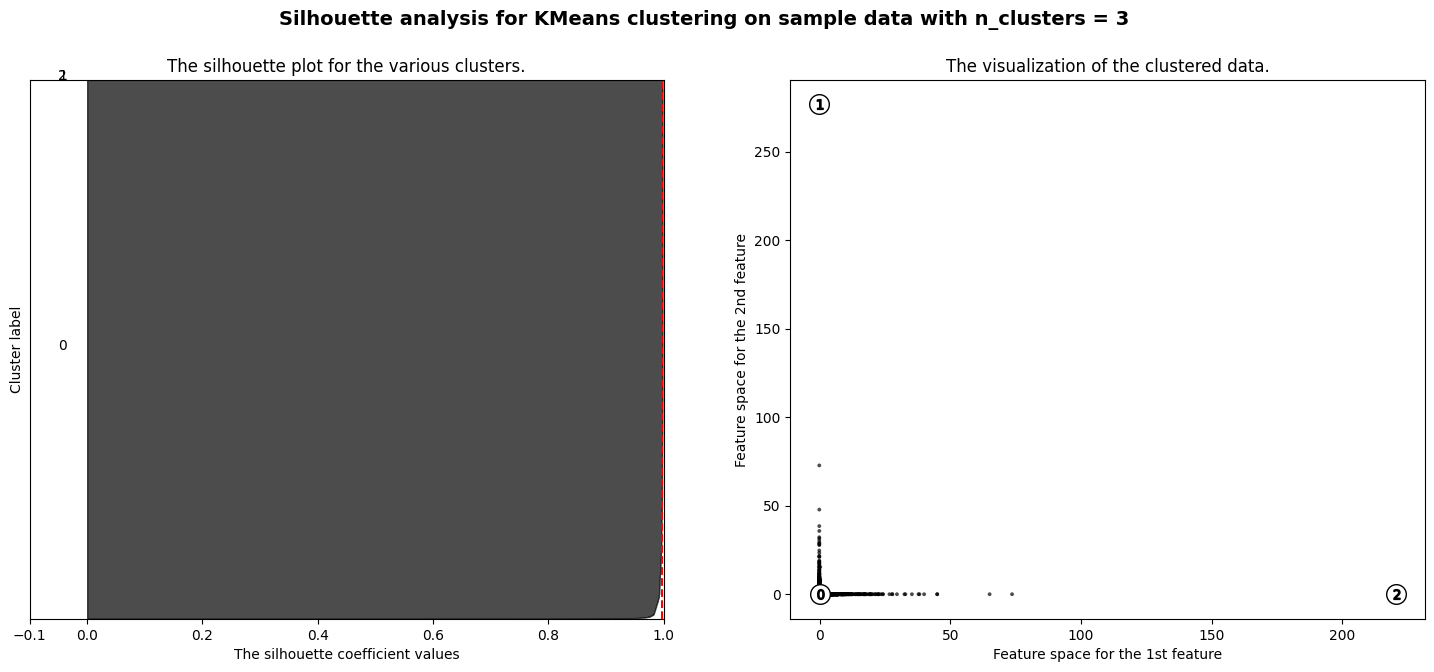

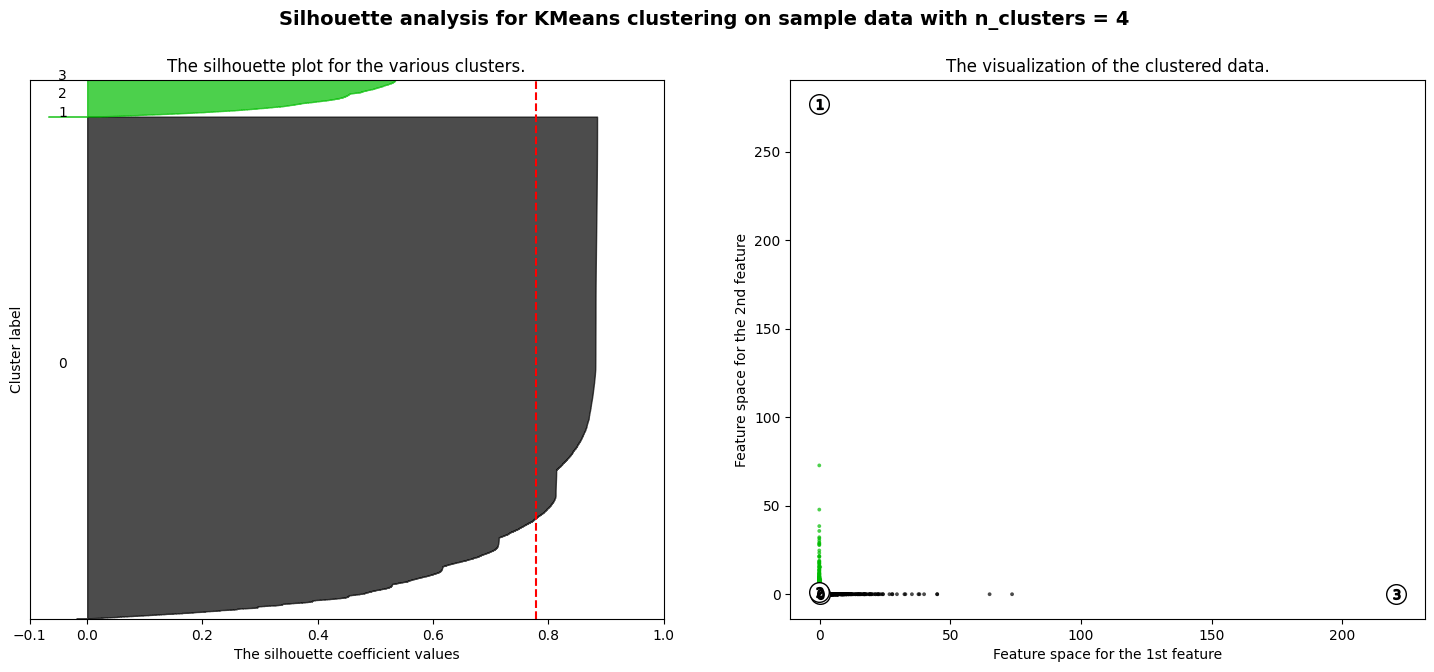

In [32]:
silhoutte_analysis(ss_scale_df[['order_id','AOC', 'AOV']],list(range(2,5)))

#### RECHECK CLUSTERING
Cluster 2
k-Means = 0.99798

Cluster 3
k-Means = 0.99668

Cluster 4
k-Means = 0.77883


##### RECHECK CLUSTER 2

In [33]:
# make cluster
Cluster_2 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=2)   #------ need to change
cluster_model.fit_predict(Cluster_2[['order_id','AOC', 'AOV']])
Cluster_2['cluster'] = cluster_model.labels_
Cluster_2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,order_id,AOC,AOV,cluster
0,2.376209,-0.141460,-0.309955,0
1,-0.130418,-0.141399,-0.309800,0
2,-0.130418,-0.141375,-0.309739,0
3,0.227672,-0.141391,-0.309778,0
4,-0.130418,-0.141260,-0.309443,0


<Axes: xlabel='cluster', ylabel='order_id'>

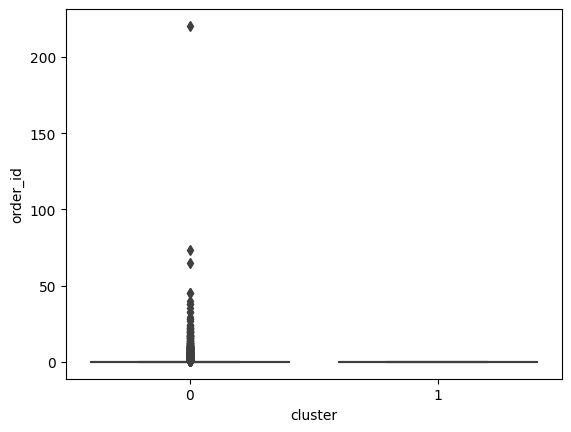

In [34]:
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='order_id')

<Axes: xlabel='cluster', ylabel='AOC'>

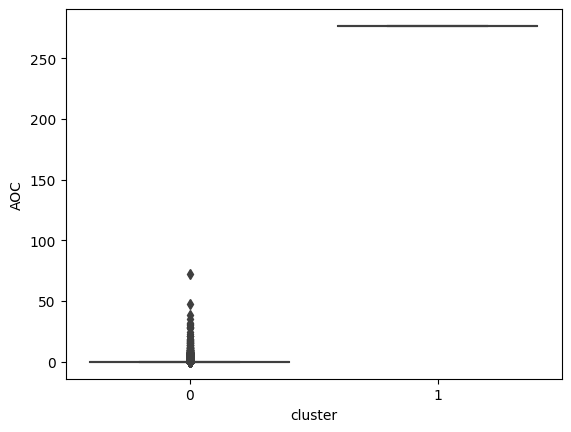

In [35]:
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='AOC')

<Axes: xlabel='cluster', ylabel='AOV'>

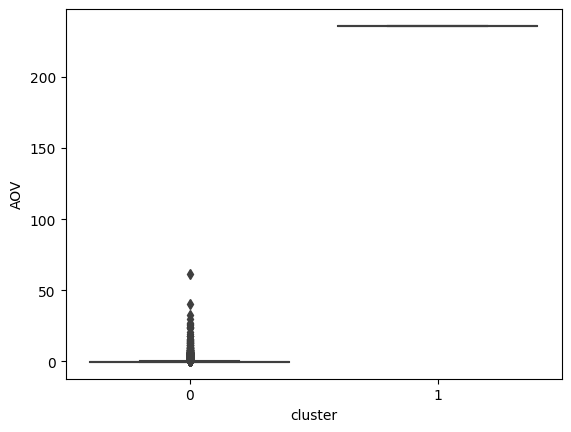

In [36]:
sns.boxplot (data =Cluster_2 , x ='cluster' , y ='AOV')

In [37]:
#RESULT FOR CLUSTER 2

#CLUSTER 0

#- TOTAL ORDER **(SAME)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**


#CLUSTER 1

#- TOTAL ORDER **(SAME)**
#- AVERAGE PROJECT VALUE **(HIGH)**
#- AVERAGE REVENUE **(HIGH)**

##### RECHECK CLUSTER 3

In [38]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_3[['order_id','AOC', 'AOV']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,order_id,AOC,AOV,cluster
0,2.376209,-0.141460,-0.309955,0
1,-0.130418,-0.141399,-0.309800,0
2,-0.130418,-0.141375,-0.309739,0
3,0.227672,-0.141391,-0.309778,0
4,-0.130418,-0.141260,-0.309443,0


<Axes: xlabel='cluster', ylabel='order_id'>

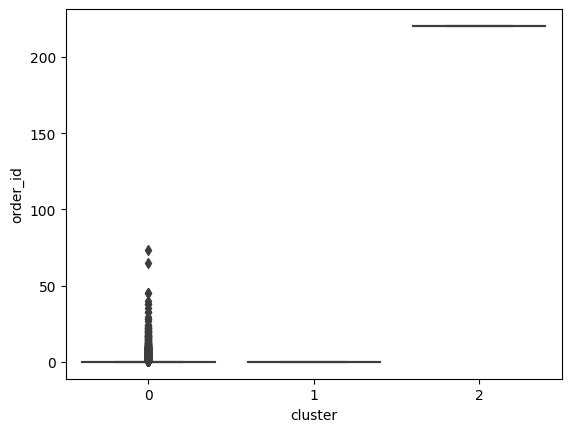

In [39]:
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='order_id')

<Axes: xlabel='cluster', ylabel='AOC'>

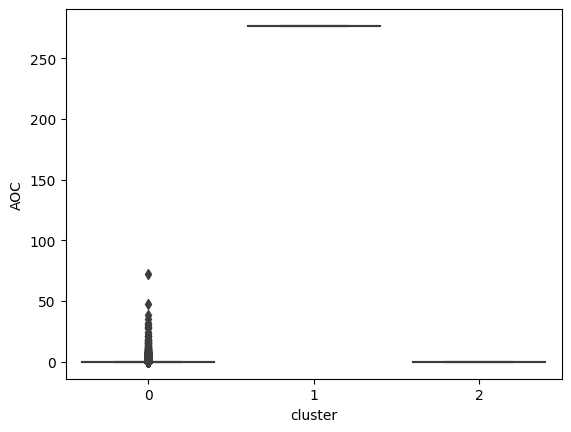

In [40]:
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='AOC')

<Axes: xlabel='cluster', ylabel='AOV'>

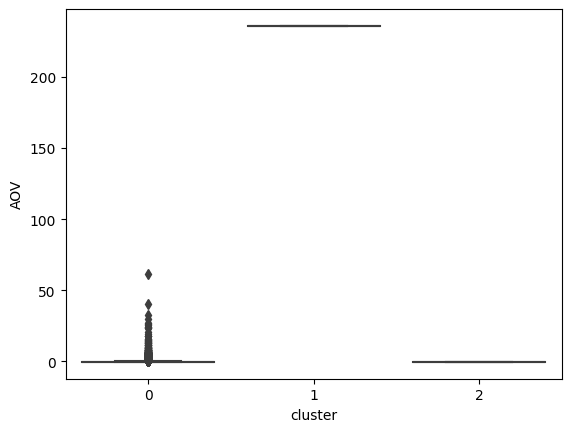

In [41]:
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='AOV')

In [42]:
#RESULT FOR CLUSTER 3

#CLUSTER 0

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**


#CLUSTER 1

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(HIGH)**
#- AVERAGE REVENUE **(HIGH)**


#CLUSTER 2

#- TOTAL ORDER **(HIGH)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**

##### RECHECK CLUSTER 4

In [43]:
# make cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_4[['order_id','AOC', 'AOV']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,order_id,AOC,AOV,cluster
0,2.376209,-0.141460,-0.309955,0
1,-0.130418,-0.141399,-0.309800,0
2,-0.130418,-0.141375,-0.309739,0
3,0.227672,-0.141391,-0.309778,0
4,-0.130418,-0.141260,-0.309443,0


<Axes: xlabel='cluster', ylabel='order_id'>

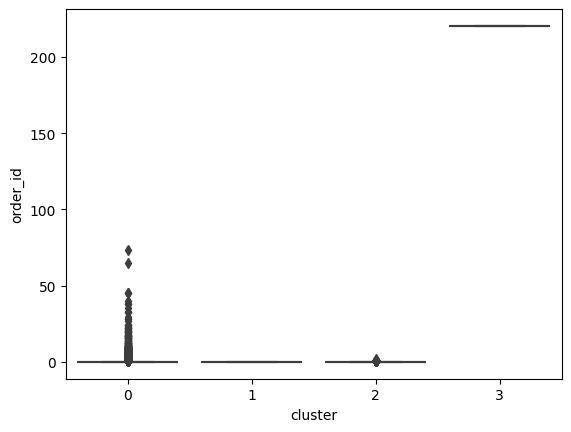

In [44]:
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='order_id')

<Axes: xlabel='cluster', ylabel='AOC'>

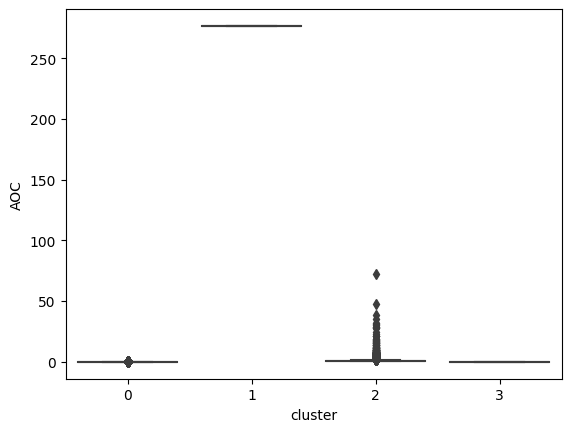

In [45]:
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='AOC')

<Axes: xlabel='cluster', ylabel='AOV'>

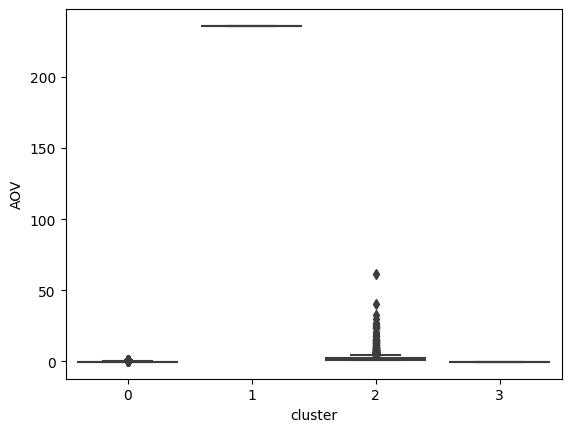

In [46]:
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='AOV')

In [47]:
#RESULT FOR CLUSTER 4

#CLUSTER 0

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**


#CLUSTER 1

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(HIGH)**
#- AVERAGE REVENUE **(HIGH)**


#CLUSTER 2

#- TOTAL ORDER **(HIGH)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**


#CLUSTER 3

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**

### CLUSTERING RESULT

In [48]:
# First, we create final dataset with 3 cluster labels
# Initialize KMeans for 3 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model.fit(buyer_clustering_feature)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [49]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [50]:
np.unique(cluster_model.labels_)

array([0, 1, 2], dtype=int32)

In [51]:
# Create a copy of the initial df and assign each accounts to a cluster
df_buyer_cluster = df_buyer.copy()
df_buyer_cluster['cluster'] = cluster_model.labels_
df_buyer_cluster.head()

,buyer_id,total_project_value,revenue,order_id,AOC,AOV,cluster
0,631a4da47255a77e0e6d7410,10000,75,8,1250.0,9.375,0
1,631a4da47255a77e0e6d7410,11100,83,1,11100.0,83.000,0
2,631a4da47255a77e0e6d7410,15000,112,1,15000.0,112.000,0
3,631a4da47255a77e0e6d7410,25000,187,2,12500.0,93.500,0
4,631a4da47255a77e0e6d7410,33813,253,1,33813.0,253.000,0


In [52]:
df_buyer_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116649 entries, 0 to 116648
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   buyer_id             116649 non-null  object 
 1   total_project_value  116649 non-null  int64  
 2   revenue              116649 non-null  int64  
 3   order_id             116649 non-null  int64  
 4   AOC                  116649 non-null  float64
 5   AOV                  116649 non-null  float64
 6   cluster              116649 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 5.8+ MB


In [53]:
# Checking the values for cluster
df_buyer_cluster[df_buyer_cluster.columns[6]].value_counts()

0    116607
2        41
1         1
Name: cluster, dtype: int64

In [54]:
#RESULT FOR CLUSTER 3

#CLUSTER 0

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**


#CLUSTER 1

#- TOTAL ORDER **(LOW)**
#- AVERAGE PROJECT VALUE **(HIGH)**
#- AVERAGE REVENUE **(HIGH)**


#CLUSTER 2

#- TOTAL ORDER **(HIGH)**
#- AVERAGE PROJECT VALUE **(LOW)**
#- AVERAGE REVENUE **(LOW)**

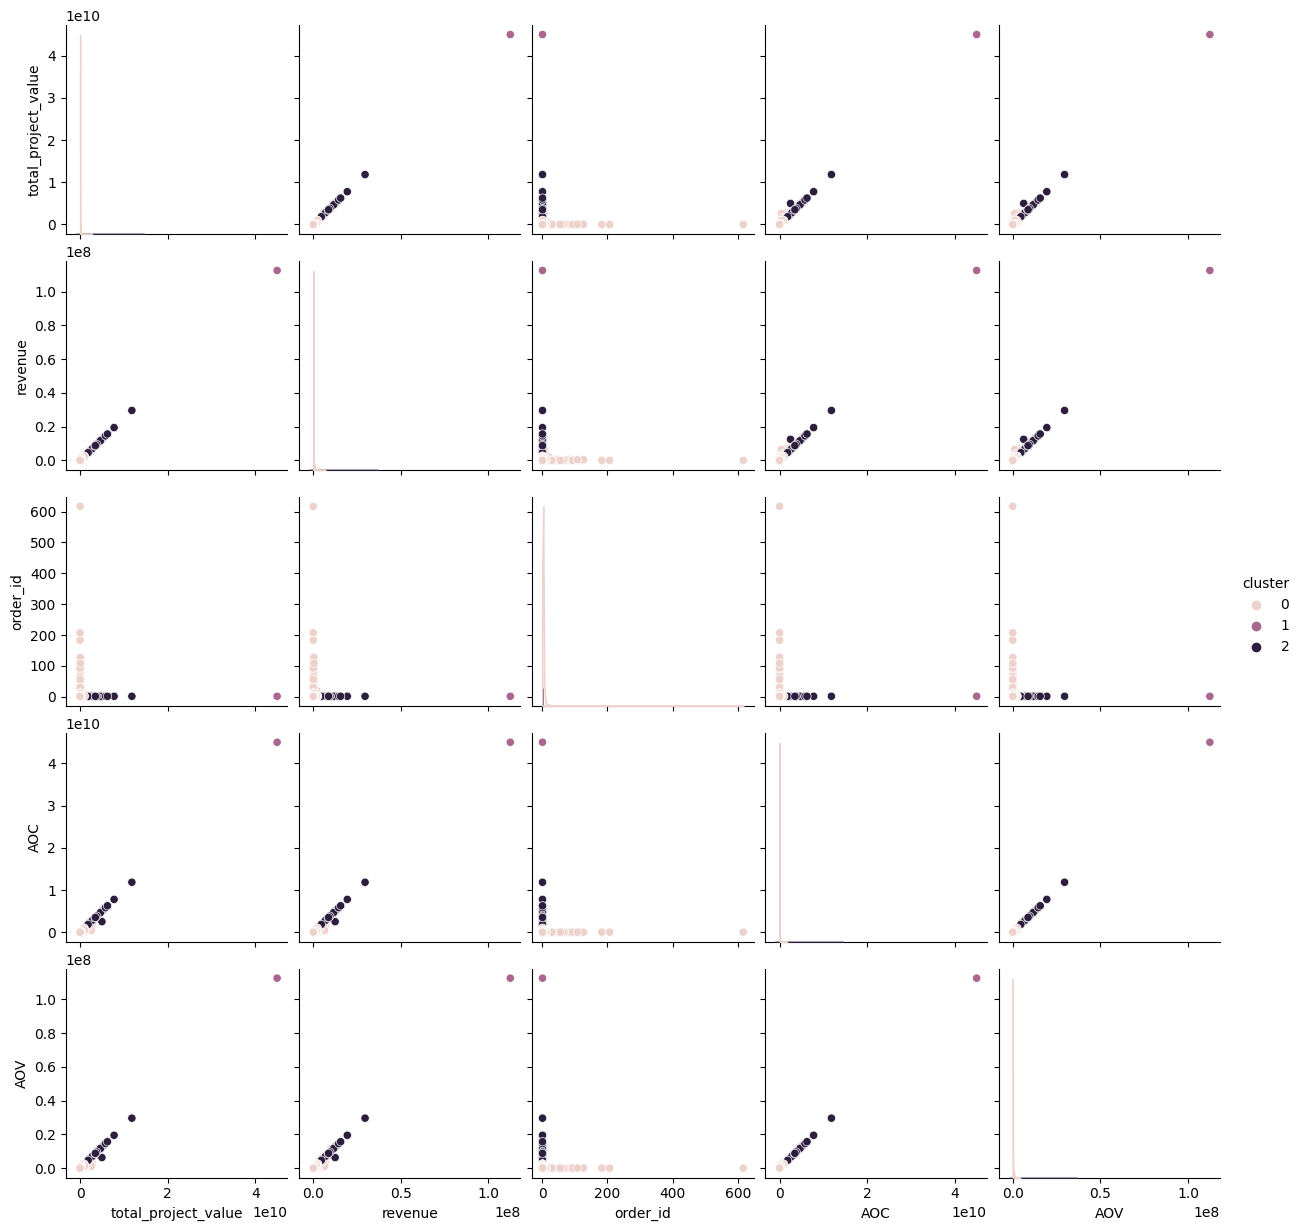

In [55]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(df_buyer_cluster,hue='cluster')

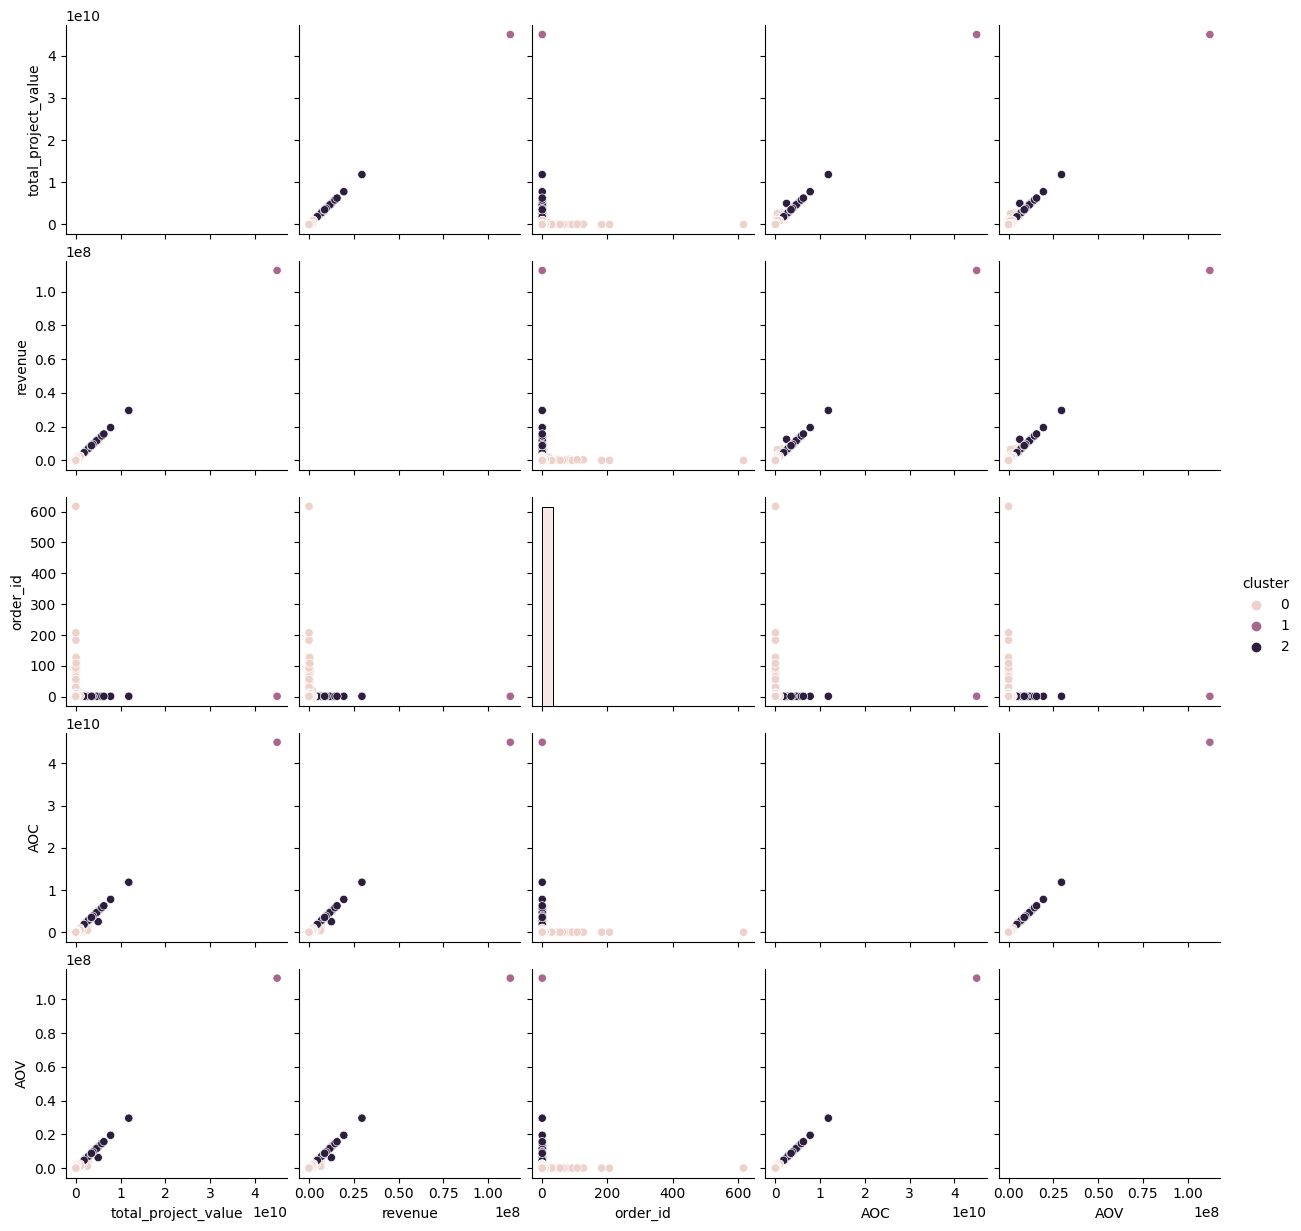

In [56]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(df_buyer_cluster,hue='cluster', diag_kind="hist")

In [57]:
# It's also typical to look into averages of values
df_buyer_cluster.groupby('cluster').mean(numeric_only='True').T

cluster,0,1,2
total_project_value,2.320505e+07,4.499040e+10,3.543374e+09
revenue,1.557474e+05,1.124760e+08,8.858435e+06
order_id,1.364326e+00,1.000000e+00,1.024390e+00
AOC,2.137986e+07,4.499040e+10,3.482515e+09
AOV,1.436315e+05,1.124760e+08,8.706287e+06


In [58]:
# Describe variable per cluster
df_buyer_cluster.groupby('cluster',as_index = False)[['order_id','AOC', 'AOV']].agg(['count','mean','min','max','median']).T

cluster                     0             1             2
order_id count   1.166070e+05  1.000000e+00  4.100000e+01
         mean    1.364326e+00  1.000000e+00  1.024390e+00
         min     1.000000e+00  1.000000e+00  1.000000e+00
         max     6.170000e+02  1.000000e+00  2.000000e+00
         median  1.000000e+00  1.000000e+00  1.000000e+00
AOC      count   1.166070e+05  1.000000e+00  4.100000e+01
         mean    2.137986e+07  4.499040e+10  3.482515e+09
         min     0.000000e+00  4.499040e+10  1.810600e+09
         max     1.717031e+09  4.499040e+10  1.182705e+10
         median  3.953730e+06  4.499040e+10  2.845494e+09
AOV      count   1.166070e+05  1.000000e+00  4.100000e+01
         mean    1.436315e+05  1.124760e+08  8.706287e+06
         min     0.000000e+00  1.124760e+08  4.526500e+06
         max     4.292578e+06  1.124760e+08  2.956762e+07
         median  2.965200e+04  1.124760e+08  7.113735e+06

In [59]:
# Create a copy of the initial df and assign each accounts to a cluster
df_buyer_cluster_final = df_buyer.copy()
df_buyer_cluster_final['cluster'] = cluster_model.labels_
df_buyer_cluster_final.head()

,buyer_id,total_project_value,revenue,order_id,AOC,AOV,cluster
0,631a4da47255a77e0e6d7410,10000,75,8,1250.0,9.375,0
1,631a4da47255a77e0e6d7410,11100,83,1,11100.0,83.000,0
2,631a4da47255a77e0e6d7410,15000,112,1,15000.0,112.000,0
3,631a4da47255a77e0e6d7410,25000,187,2,12500.0,93.500,0
4,631a4da47255a77e0e6d7410,33813,253,1,33813.0,253.000,0


In [60]:
# And to check the pivot table of each categorical columns
for col in df_buyer_cluster_final.select_dtypes(include='object').columns:

  # Create crosstab by columns
  df_pivot = df_buyer_cluster_final[['cluster',col]].groupby('cluster').value_counts().reset_index().rename(columns = {0: 'values'})

  # Display pivot_table
  display(df_pivot.pivot(index=col, columns='cluster', values='values').fillna(0))

  print('\n')

cluster,0,1,2
buyer_id,,,
631a4da47255a77e0e6d7410,39.0,0.0,0.0
631a4f977255a77e0e6dec73,97.0,0.0,0.0
631a51497255a77e0e6eb585,31.0,0.0,0.0
631a514d7255a77e0e6eb6e5,2.0,0.0,0.0
631a514e7255a77e0e6eb785,1.0,0.0,0.0
...,...,...,...
63b0642410d7d4a770888d88,1.0,0.0,0.0
63b0643d10d7d4a770888e72,1.0,0.0,0.0
63b0656910d7d4a770889040,1.0,0.0,0.0


## COHORT ANALYSIS (BUYER)

In [77]:
# Preparation table of cohort analysis
customer_retention = df_order_transaction.sort_values(by=['buyer_id','transaction_date','order_id'], ascending=[False,True,False])
customer_retention = customer_retention.groupby(['buyer_id',pd.Grouper(key='transaction_date', freq='M')]).last()[['order_status','revenue']]
customer_retention = customer_retention.reset_index()
customer_retention

,buyer_id,transaction_date,order_status,revenue
0,631a4da47255a77e0e6d7410,2022-01-31,Dibatalkan,41625
1,631a4da47255a77e0e6d7410,2022-02-28,Dibatalkan,549
2,631a4da47255a77e0e6d7410,2022-03-31,Ditolak Penjual,112
3,631a4da47255a77e0e6d7410,2022-04-30,Selesai,83250
4,631a4da47255a77e0e6d7410,2022-05-31,Selesai,1650
...,...,...,...,...
52559,63b0642410d7d4a770888d88,2022-03-31,Selesai,774
52560,63b0643d10d7d4a770888e72,2022-12-31,Diterima,774
52561,63b0656910d7d4a770889040,2022-07-31,Selesai,774
52562,63b0657e031d7b3fee1ab87d,2022-11-30,Selesai,774


In [78]:
#Get Transaction Month for the dataframe
import datetime as dt

def get_date_int(x) :
    return dt.datetime(x.year, x.month,1)

customer_retention['transaction_date'] = pd.to_datetime(customer_retention['transaction_date'])
customer_retention['transaction_month'] = customer_retention['transaction_date'].apply(get_date_int)
customer_retention.head()

,buyer_id,transaction_date,order_status,revenue,transaction_month
0,631a4da47255a77e0e6d7410,2022-01-31,Dibatalkan,41625,2022-01-01
1,631a4da47255a77e0e6d7410,2022-02-28,Dibatalkan,549,2022-02-01
2,631a4da47255a77e0e6d7410,2022-03-31,Ditolak Penjual,112,2022-03-01
3,631a4da47255a77e0e6d7410,2022-04-30,Selesai,83250,2022-04-01
4,631a4da47255a77e0e6d7410,2022-05-31,Selesai,1650,2022-05-01


In [79]:
customer_retention.tail()

,buyer_id,transaction_date,order_status,revenue,transaction_month
52559,63b0642410d7d4a770888d88,2022-03-31,Selesai,774,2022-03-01
52560,63b0643d10d7d4a770888e72,2022-12-31,Diterima,774,2022-12-01
52561,63b0656910d7d4a770889040,2022-07-31,Selesai,774,2022-07-01
52562,63b0657e031d7b3fee1ab87d,2022-11-30,Selesai,774,2022-11-01
52563,63b0659310d7d4a77088905e,2022-06-30,Selesai,774,2022-06-01


In [80]:
#Create Cohort Month per Rows

group = customer_retention.groupby('buyer_id')['transaction_month']
customer_retention['cohort_month'] = group.transform('min')

customer_retention[customer_retention['buyer_id'] == '63b0642410d7d4a770888d88']

,buyer_id,transaction_date,order_status,revenue,transaction_month,cohort_month
52559,63b0642410d7d4a770888d88,2022-03-31,Selesai,774,2022-03-01,2022-03-01


In [81]:
#Calculate Cohort Index for Each Rows

def get_date_int(customer_retention, column) :
    year = customer_retention[column].dt.year
    month = customer_retention[column].dt.month
    day = customer_retention[column].dt.day

    return year, month, day

transaction_year, transaction_month, transaction_day = get_date_int(customer_retention, 'transaction_month')
cohort_year, cohort_month, cohort_day = get_date_int(customer_retention,'cohort_month')

In [82]:
#Calculate Year Differences
years_diff = transaction_year - cohort_year

#Calculate Month Differences
months_diff = transaction_month - cohort_month

customer_retention['cohort_index'] = years_diff*12 + months_diff + 1

customer_retention.head()

,buyer_id,transaction_date,order_status,revenue,transaction_month,cohort_month,cohort_index
0,631a4da47255a77e0e6d7410,2022-01-31,Dibatalkan,41625,2022-01-01,2022-01-01,1
1,631a4da47255a77e0e6d7410,2022-02-28,Dibatalkan,549,2022-02-01,2022-01-01,2
2,631a4da47255a77e0e6d7410,2022-03-31,Ditolak Penjual,112,2022-03-01,2022-01-01,3
3,631a4da47255a77e0e6d7410,2022-04-30,Selesai,83250,2022-04-01,2022-01-01,4
4,631a4da47255a77e0e6d7410,2022-05-31,Selesai,1650,2022-05-01,2022-01-01,5


In [83]:
customer_retention.tail()

,buyer_id,transaction_date,order_status,revenue,transaction_month,cohort_month,cohort_index
52559,63b0642410d7d4a770888d88,2022-03-31,Selesai,774,2022-03-01,2022-03-01,1
52560,63b0643d10d7d4a770888e72,2022-12-31,Diterima,774,2022-12-01,2022-12-01,1
52561,63b0656910d7d4a770889040,2022-07-31,Selesai,774,2022-07-01,2022-07-01,1
52562,63b0657e031d7b3fee1ab87d,2022-11-30,Selesai,774,2022-11-01,2022-11-01,1
52563,63b0659310d7d4a77088905e,2022-06-30,Selesai,774,2022-06-01,2022-06-01,1


In [84]:
#Final Grouping to Calculate Total Unique Users in Each Cohort
cohort_group = customer_retention.groupby(['cohort_month','cohort_index'])

cohort_data = cohort_group['buyer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot_table(index = 'cohort_month',
                                        columns = 'cohort_index',
                                        values = 'buyer_id'
                                       )

cohort_data.head()

,cohort_month,cohort_index,buyer_id
0,2022-01-01,1,3153
1,2022-01-01,2,1659
2,2022-01-01,3,1988
3,2022-01-01,4,1872
4,2022-01-01,5,1730


In [85]:
#Calculate Retention rate per Month Index

cohort_size = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_size, axis = 0)

retention = retention.round(3)*100

retention.index = retention.index.strftime('%Y-%m')

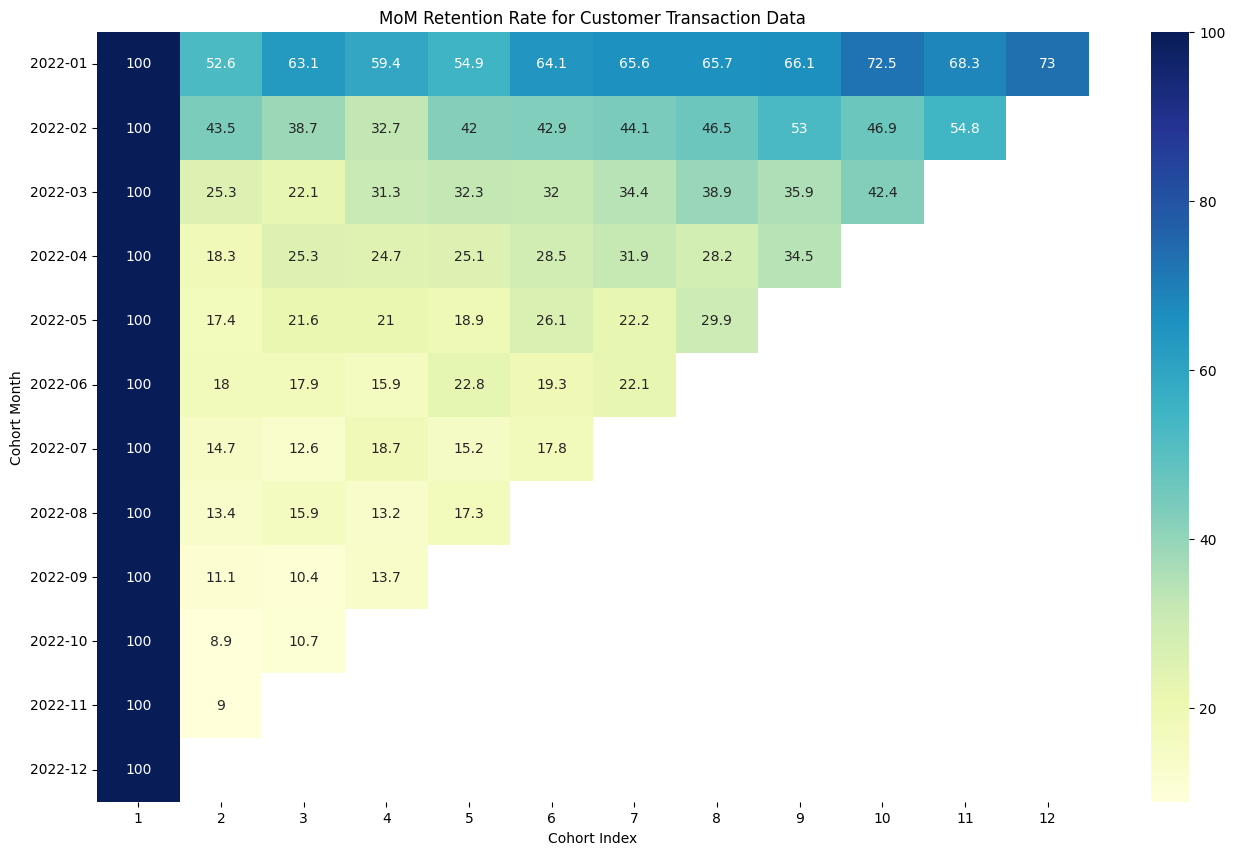

In [86]:
#Plotting Heatmap for Retention Table

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,10))

plt.title('MoM Retention Rate for Customer Transaction Data')

sns.heatmap(retention, annot = True, cmap="YlGnBu", fmt='g')

plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation = 'horizontal')

plt.show()

## EXPLORATORY DATA ANALYTICS 2

In [75]:
# Customer Lifetime Value (CLV)
clv = df_buyer.groupby('buyer_id')['revenue'].sum().mean()
print("CLV =",clv)

# Average Revenue per User (ARPU)
arpu = df_buyer_cluster['revenue'].sum()/df_buyer_cluster['buyer_id'].count()
print("ARPU =",arpu)

CLV = 1454872.2288836846
ARPU = 159769.16434774408


In [72]:
# Calculate CLV for each cluster
clv_per_cluster = df_buyer_cluster.groupby('cluster')['revenue'].sum()

# Print CLV for each cluster
for cluster, clv in clv_per_cluster.items():
    print(f"CLV for Cluster {cluster} = {clv}")

# Alternatively, you can store the results in a dictionary for further analysis or visualization
clv_dict = clv_per_cluster.to_dict()
print("CLV Dictionary:", clv_dict)


CLV for Cluster 0 = 18161241404
CLV for Cluster 1 = 112476000
CLV for Cluster 2 = 363195848
CLV Dictionary: {0: 18161241404, 1: 112476000, 2: 363195848}
